<a href="https://colab.research.google.com/github/CJ-Kaufman/INDE577_2024/blob/main/Supervised_Learning/K%20Nearest%20Neighbors/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN Implementation
## Introduction
Often times, data is not linearly seperable and there are more than two types of data present. This eliminates the possibility for successfully implementing binary classification, a perceptron, or a singular linear regression model. Enter K-nearest neighbors: an algorithm which assumes that similar data exist close to each other. If the guess that like data is grouped together is true enough to be useful, then this nonparametric learning algorithm can be a good classification tool once trained appropriately.

## Imports and Data Loading

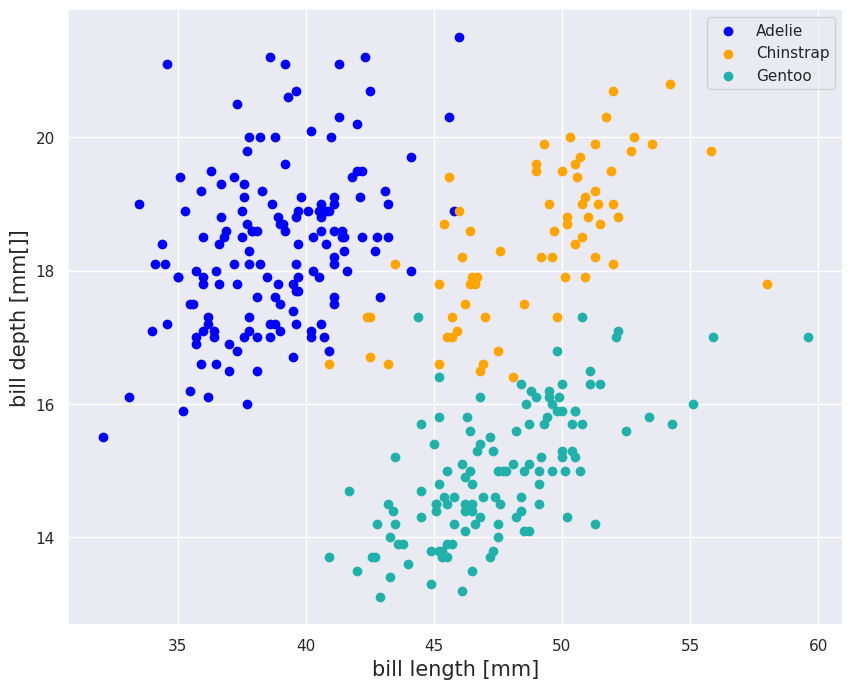

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
birds = sns.load_dataset("penguins")

# Plot the data
penguins = ["Adelie", "Chinstrap", "Gentoo"]
colors = ["blue", "orange", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(penguins, colors):
    temp_df = birds[birds.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.bill_depth_mm,
               c = color,
               label = species,
               )

ax.set_xlabel("bill length [mm]", fontsize = 15)
ax.set_ylabel("bill depth [mm[]]", fontsize = 15)
ax.legend()
plt.show()

The above plot shows 3 different species of penguins, who are generally grouped together by their bill dimensions with some outliers and overlap.

## Separate training and testing data
In order to verify the model on data not used in training, the data must be split before use.

In [30]:
from sklearn.model_selection import train_test_split

X = birds[["bill_length_mm",
          "bill_depth_mm"]].to_numpy()

y = birds["species"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=1)

## Defining Functions
To measure distance between points on a plot like the one shown above, we will implement Euclidean distance which is defined by the following equation:

$$
d(p, q) = \sqrt{(p - q)^{T} (p - q)}
$$

Next, a function is written to compute the points closest on the plot to the point in question: i.e, the k-nearest neighbors. We can test this out with a few points as well.

In [31]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between point 10 and 67 is {distance(X[10], X[67])}")

The distance between point 10 and 67 is 3.8587562763149514


In [32]:
def k_nearest_neighbors(point,
                        training_features,
                        training_labels,
                        k):
    # Create an empty list to store neighbors and distances
    neighbors = []

    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        temp_data = [p, label, d]
        neighbors.append(temp_data)

    neighbors.sort(key = lambda x : x[-1])

    return neighbors[:k]

In [33]:
# Test the k_nearest_neighbors function
k_nearest_neighbors(X_test[-1], X_train, y_train, 5)

[[array([50.7, 19.7]), 'Chinstrap', 0.22360679774998055],
 [array([50.6, 19.4]), 'Chinstrap', 0.22360679774998216],
 [array([50.3, 20. ]), 'Chinstrap', 0.4472135954999579],
 [array([50.9, 19.1]), 'Chinstrap', 0.640312423743284],
 [array([50.8, 19. ]), 'Chinstrap', 0.6708203932499369]]

In [34]:
# Show the true label
y_test[-1]

'Chinstrap'

## Testing (and a few more functions)
While KNN can be used for regression or classification machine learning, this example will implement the algorithm for the purposes of classification of penguin species. Next we'll develop a prediction function, followed by one to compute the classification error so we can improve the model using the loss while training.

In [35]:
def KNN_Predict(point,
                training_features,
                training_labels,
                k,
                regression = False):

    neighbors = k_nearest_neighbors(point,
                                    training_features,
                                    training_labels,
                                    k)

    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)

    else:
        return sum(x[1] for x in neighbors)/k

In [36]:
# Test our function
KNN_Predict(X_test[20], X_train, y_train, 5)

'Gentoo'

In [37]:
def classification_error(test_features,
                         test_labels,
                         training_features,
                         training_labels,
                         k):
    error = 0
    for point, label in zip(test_features, test_labels):
        error += label != KNN_Predict(point,
                                      training_features,
                                      training_labels,
                                      k)
    return error/len(test_features)

In [38]:
# Test our function
classification_error(X_test, y_test, X_train, y_train, 7)

0.07894736842105263

So, the error the KNN algorithm makes in classifying the species of penguins is about 7.89%

## Choosing the Right K
K is how the algrithm chooses the number of nearby neighbors to use when deciding how to classify a certain point. If K=1, then a point will be classified as whatever it's nearest neighbor is. If K=3, and 2 of the 3 closest points are orange while the 3rd one is blue, then the point in question will be classified as orange. (You can see the benefit of an odd number for tiebreaking). As K increases, it becomes more stable up to a certain point.

In [54]:
possible_k = [k for k in range(3, 26, 2)] #Start: 3, 26, 2
errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

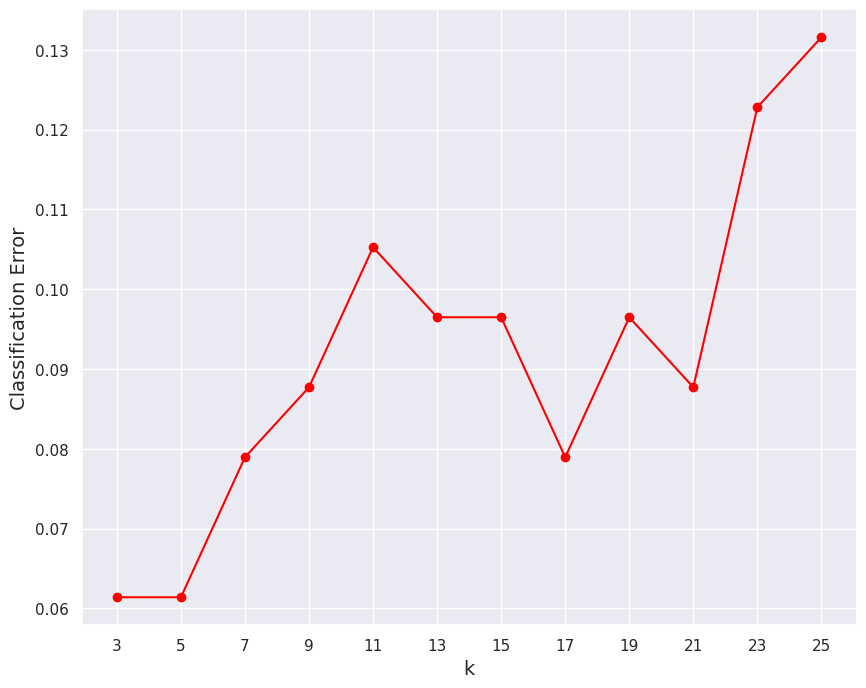

In [55]:
plt.figure(figsize = (10, 8))
plt.plot(possible_k, errors, color = 'red', marker = "o")
plt.xlabel('k', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xticks(possible_k)
plt.show()

For this data, it appears the most effective value of K is 3 or 5. As K increases after that, it loses accuracy at varying levels until sort of skyrocketing after 21, which makes sense because of the limited size of our data set.